## Statistique inférentielle - Théorie de l'estimation - Exercice 12.2

(Dé)Montrez numériquement que la médiane est bien un estimateur de la moyenne moins efficace que la moyenne :)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

L'efficacité d'un estimateur est liée à la variance de cet estimateur. Ainsi, plus un estimateur est efficace moins sa variance est élevée (plus son estimation est centrée sur la valeur attendue).

Nous partirons donc d'une population gaussienne centrée sur zéro et d'écart-type 1, contenant 100000 valeurs.

In [3]:
population_size = 100000
sigma = 1
center = 0

population_df = pd.DataFrame(np.random.normal(size=population_size,loc=center,scale=sigma))

Au sein de cette population fixée, nous allons tiré 5000 échantillons de taille 50 sans remplacement et, pour chaque échantillon, calculer la moyenne et la médiane.

In [4]:
n_samples = 5000
sample_size = 5

estimateur_df = pd.DataFrame()

random.seed(4242)

moyenne_list = []
mediane_list = []
for i_sample in range(0,n_samples):
    sample_list = population_df.sample(sample_size)
    moyenne_list.append(np.mean(sample_list))
    mediane_list.append(np.median(sample_list))

estimateur_df = pd.DataFrame()
estimateur_df['moyenne'] = moyenne_list
estimateur_df['mediane'] = mediane_list

Dessinons un histogramme de ces valeurs, en indiquant la moyenne par une barre verticale.

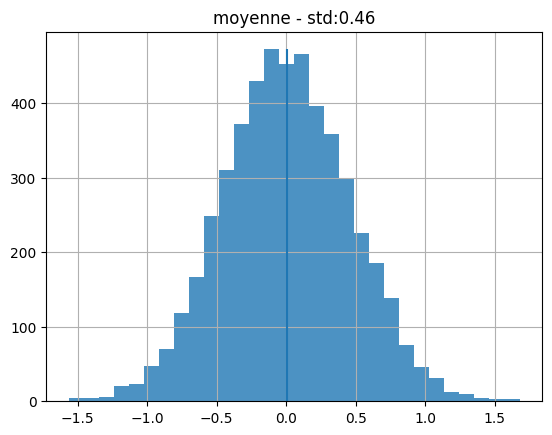

In [5]:
n_bins = 30

estimateur_df['moyenne'].hist(bins=n_bins, alpha=0.8)
plt.vlines(estimateur_df['moyenne'].mean(),ymin=0,ymax=np.histogram(estimateur_df['moyenne'], bins=n_bins)[0].max())
plt.title('moyenne - std:{0:.2f}'.format(estimateur_df['moyenne'].std()))
plt.show()

On voit que les valeurs de la moyenne sont bien centrée sur la moyenne attendue, la moyenne de la population, 0.

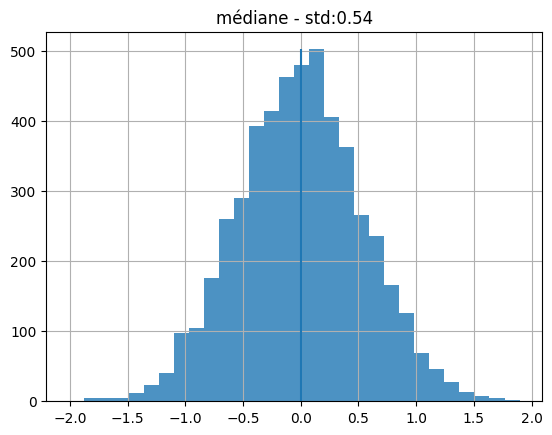

In [6]:
estimateur_df['mediane'].hist(bins=n_bins, alpha=0.8)
plt.vlines(estimateur_df['mediane'].mean(),ymin=0,ymax=np.histogram(estimateur_df['mediane'], bins=n_bins)[0].max())
plt.title('médiane - std:{0:.2f}'.format(estimateur_df['mediane'].std()))
plt.show()

Ici aussi, les valeurs de l'estimateur (la médiane) sont bien centrées autours de la valeur attendue, la moyenne de la population globale, 0.

<p>Il faut y regarder à deux fois pour voir qu'il y a une réelle différence mais regarder bien les axes horizontaux: l'histogramme des médianes est bien plus large que l'histogramme des moyennes.</p> 
<p>Ceci est confirmé par le calcul des écarts-types: de 0.14 pour les moyennes, il passe à 0.18 pour les médianes.</p> 
<p>L'histogramme des moyennes est bien plus centré sur la valeur attendue, 0. </p>
<p>L'estimateur correspondant est bien plus efficace!</p>
<p>Pour le mettre en évidence, on peut supperposer les deux histogrammes.</p>

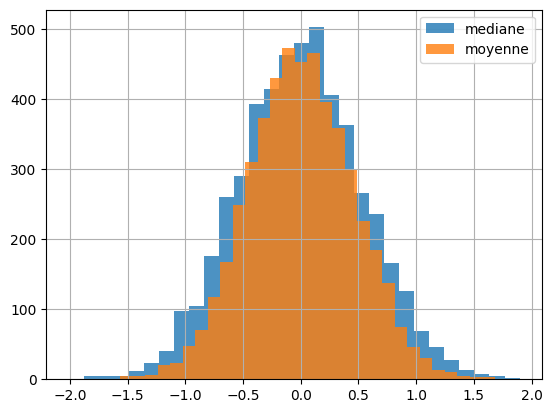

In [7]:
estimateur_df['mediane'].hist(label='mediane',alpha=0.8, bins=n_bins)
estimateur_df['moyenne'].hist(label='moyenne',alpha=0.8, bins=n_bins)
plt.legend()
plt.show()

In [8]:
math.sqrt(np.var(estimateur_df['mediane'], ddof=0))

0.5415040772939673

In [9]:
math.sqrt(np.var(estimateur_df['moyenne'], ddof=0))

0.4566961279614707

In [10]:
math.sqrt(np.var(estimateur_df['mediane'], ddof=0))/math.sqrt(np.var(estimateur_df['moyenne'], ddof=0))

1.1856988578183247

In [11]:
math.sqrt(math.pi/2)

1.2533141373155001